In [1]:
import numpy as np
import pandas as pd
import warnings

In [2]:
TicketData=pd.read_csv('/content/supportTicketData.csv')
print('No of rows before duplicates',TicketData.shape)
TicketData=TicketData.drop_duplicates()
print('No of rows after removings duplicates',TicketData.shape)
TicketData.head(5)

No of rows before duplicates (19796, 2)
No of rows after removings duplicates (19796, 2)


,body,urgency
0,connection issues with assigned address hi fac...,P1
1,cannot access hi cannot access fallowing link ...,P2
2,re address shown valid dear colleagues remarke...,P1
3,sent tuesday critical alert following alert oc...,P2
4,code spelling mistake hello should discover fo...,P2


In [3]:
TicketData['urgency'].unique()

array(['P1', 'P2', 'P3'], dtype=object)

In [4]:
TicketData['urgency']=TicketData['urgency'].replace({'P1':'High','P2':'Medium','P3':'Low'})

Data Cleaning (Special Char Remove)

In [5]:
TicketData['body']=TicketData['body'].str.replace("[\*%/&!@$:-?,<>()-]",'',regex=True).astype(str)
TicketData['body']=TicketData['body'].str.replace('\d+','',regex=True).astype(str)
TicketData['body']=TicketData['body'].str.replace(r'\b\w{1,3}\b', ' ',regex=True).astype(str)
TicketData['body']=TicketData['body'].str.replace(r'[^a-z A-Z]',r' ',regex=True).astype(str)

Converting into lower space

In [6]:
TicketData['body']=TicketData['body'].apply(str.lower)

Remove Post Tagging

In [7]:
import spacy
nlp=spacy.load('en_core_web_sm')

In [8]:
def transform(x):
    words=[]
    doc=nlp(x)
    for j in doc:
        if ((j.pos_=="NOUN") or (j.pos_=="PROPN")):
            words=words+[str(j)]
    return " ".join(words)

In [9]:
TicketData['body']=TicketData['body'].apply(transform)

In [10]:
import spacy
nlp=spacy.load('en_core_web_sm')
def transform(x):
    words=[]
    doc=nlp(x)
    for j in doc:
        if ((j.pos_=="NOUN") or (j.pos_=="PROPN")  or (j.pos_=="ADJ") or (j.pos_=="ADV") or (j.pos_=="INTJ") or (j.pos_=="VERB") or (j.pos_=="ADP") ):
            words=words+[str(j)]
    return " ".join(words)

In [11]:
TicketData['body']=TicketData['body'].apply(transform)

Lemmatization

In [12]:
import pandas as pd
import nltk
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import wordnet
nltk.download('omw-1.4')

nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')


wordnet_lemmatizer = WordNetLemmatizer()


def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def lemmatize_text(text):
    words = nltk.word_tokenize(text)
    tagged_words = pos_tag(words)
    lemmatized_words = [wordnet_lemmatizer.lemmatize(word, pos=get_wordnet_pos(tag)) for word, tag in tagged_words]
    lemmatized_text = ' '.join(lemmatized_words)
    return lemmatized_text


[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [13]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [14]:
TicketData['body_lem'] = TicketData['body'].apply(lemmatize_text)

In [15]:
TicketData['body_lem']

0        connection issue address connection issue numb...
1                                    fallowing link thanks
2        address colleague name wrong compliance office...
3        tuesday alert alert status data source type da...
4                      code spell mistake code thanks head
                               ...                        
19791                             fuse monitor cable thing
19792            right developer repository user architect
19793                                                 wang
19794    today equipment equipment display mouse headse...
19795                          machine moment version keep
Name: body_lem, Length: 19796, dtype: object

Remove Stop Words & Converting text into vectorization

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction._stop_words import ENGLISH_STOP_WORDS
corpus = TicketData['body'].values
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names_out())

['abandon' 'abeam' 'abilities' ... 'zone' 'zones' 'zoom']


In [17]:
VectorizedText=pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
VectorizedText['originalText']=pd.Series(corpus)
VectorizedText

,abandon,abeam,abilities,ability,abort,aborting,absence,absences,absent,absorption,...,zealand,zebra,zephyr,zeus,zipper,zipping,zone,zones,zoom,originalText
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,connection issues address connection issues nu...
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,fallowing link thanks
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,address colleagues name wrong compliance offic...
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,tuesday alert alert status data source type da...
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,code spelling mistake code thanks head
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19791,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,fuses monitor cable things
19792,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,rights developer repository user architect
19793,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,wang
19794,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,today equipment equipment display mouse headse...


In [18]:
textvector=pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
textvector['Priority']=TicketData['urgency']
textvector.head()

,abandon,abeam,abilities,ability,abort,aborting,absence,absences,absent,absorption,...,zealand,zebra,zephyr,zeus,zipper,zipping,zone,zones,zoom,Priority
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,High
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Medium
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,High
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Medium
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Medium


Spiliting Target and Predictors

In [19]:
textvector['Priority']=textvector['Priority'].replace({'High':3.0,'Medium':2.0,'Low':1.0})

In [20]:
TargetVariable=textvector.columns[-1]
Predictors=textvector.columns[:-1]

In [21]:
X=textvector[Predictors].values
Y=textvector[TargetVariable].values

Applying PCA

[ 1.51  2.76  3.96 ... 96.85 96.85 96.85]


Text(0, 0.5, '% Variance explained')

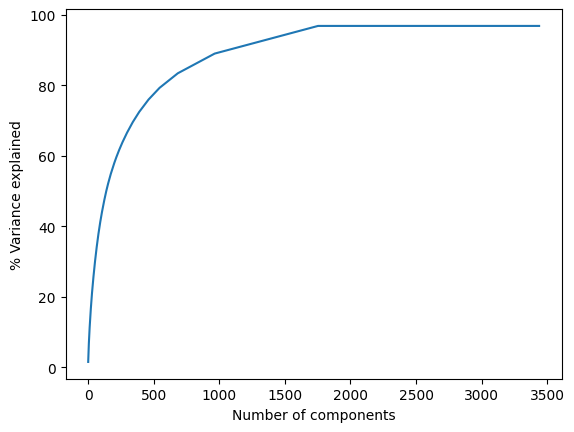

In [22]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

NumComponents = 3438
pca = PCA(n_components=NumComponents, svd_solver='randomized')
pca_fit = pca.fit(X)
reduced_x = pca_fit.transform(X)
var_explained_cum = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4) * 100)
print(var_explained_cum)
plt.plot(range(1, len(var_explained_cum) + 1), var_explained_cum)
plt.xlabel('Number of components')
plt.ylabel('% Variance explained')

In [23]:
#Num Of Dimentions selection based on the above curve
Num_Newcomponents=1600
pca2=PCA(n_components=Num_Newcomponents)
pca1_fit=pca2.fit(X)
reduced_x1=pca1_fit.transform(X)

In [24]:
X=reduced_x1
Predictors=pd.Series(['PC']*Num_Newcomponents).str.cat(pd.Series(range(1,Num_Newcomponents+1)).apply(str)).values
Predictors

array(['PC1', 'PC2', 'PC3', ..., 'PC1598', 'PC1599', 'PC1600'],
      dtype=object)

In [25]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
PredictorScaler=MinMaxScaler()
PredictorScalerFit=PredictorScaler.fit(X)
X=PredictorScalerFit.transform(X)
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=450)
Y_train = Y_train.reshape(-1)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(15836, 1600)
(15836,)
(3960, 1600)
(3960,)


In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

LR = LogisticRegression()
LR.fit(X_train, Y_train)
y_predLRtrain = LR.predict(X_train)
y_predLR = LR.predict(X_test)

classification_rep_train = classification_report(Y_train, y_predLRtrain)
classification_rep_test = classification_report(Y_test, y_predLR)

print("Classification Report - Training Set:")
print(classification_rep_train)

print("Classification Report - Test Set:")
print(classification_rep_test)


Classification Report - Training Set:
              precision    recall  f1-score   support

         1.0       0.90      0.98      0.94      6035
         2.0       0.71      0.58      0.64      4438
         3.0       0.72      0.75      0.73      5363

    accuracy                           0.79     15836
   macro avg       0.77      0.77      0.77     15836
weighted avg       0.78      0.79      0.78     15836

Classification Report - Test Set:
              precision    recall  f1-score   support

         1.0       0.85      0.94      0.89      1485
         2.0       0.56      0.47      0.51      1090
         3.0       0.64      0.66      0.65      1385

    accuracy                           0.71      3960
   macro avg       0.69      0.69      0.68      3960
weighted avg       0.70      0.71      0.70      3960



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [32]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

svc = SVC()
svc.fit(X_train, Y_train)
y_pred_svc_train = svc.predict(X_train)
y_pred_svc = svc.predict(X_test)

classification_rep_train = classification_report(Y_train, y_pred_svc_train)
classification_rep_test = classification_report(Y_test, y_pred_svc)

print("Classification Report - Training Set:")
print(classification_rep_train)

print("Classification Report - Test Set:")
print(classification_rep_test)


Classification Report - Training Set:
              precision    recall  f1-score   support

         1.0       0.87      0.98      0.92      6035
         2.0       0.78      0.55      0.64      4438
         3.0       0.73      0.80      0.76      5363

    accuracy                           0.80     15836
   macro avg       0.79      0.78      0.78     15836
weighted avg       0.80      0.80      0.79     15836

Classification Report - Test Set:
              precision    recall  f1-score   support

         1.0       0.82      0.96      0.88      1485
         2.0       0.60      0.40      0.48      1090
         3.0       0.65      0.69      0.67      1385

    accuracy                           0.71      3960
   macro avg       0.69      0.68      0.68      3960
weighted avg       0.70      0.71      0.70      3960



In [33]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Initialize and train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, Y_train)

# Predict on training and test data
y_pred_nb_train = nb_classifier.predict(X_train)
y_pred_nb = nb_classifier.predict(X_test)

# Calculate classification metrics using classification_report
classification_rep_train = classification_report(Y_train, y_pred_nb_train)
classification_rep_test = classification_report(Y_test, y_pred_nb)

print("Classification Report - Training Set:")
print(classification_rep_train)

print("Classification Report - Test Set:")
print(classification_rep_test)


Classification Report - Training Set:
              precision    recall  f1-score   support

         1.0       0.38      1.00      0.55      6035
         2.0       0.00      0.00      0.00      4438
         3.0       0.62      0.00      0.00      5363

    accuracy                           0.38     15836
   macro avg       0.34      0.33      0.19     15836
weighted avg       0.36      0.38      0.21     15836

Classification Report - Test Set:
              precision    recall  f1-score   support

         1.0       0.38      1.00      0.55      1485
         2.0       0.00      0.00      0.00      1090
         3.0       0.75      0.00      0.01      1385

    accuracy                           0.38      3960
   macro avg       0.38      0.33      0.18      3960
weighted avg       0.40      0.38      0.21      3960



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif